# Friendly- neighborhood kaggle contest(MLR)

In [1]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from sklearn.cluster import KMeans
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Exploring dataset

In [2]:
filename = "/kaggle/input/mydata/MultiClass-dataset.xlsx"
df = pd.read_excel(filename)
df.head()

,S.No,SL,RT,FL,SL.1,CTL,LW,Type
0,1,17.0,7.0,4.2,12.7,4.3,0.3,KK
1,2,15.3,27.0,2.2,11.0,4.3,0.3,KK
2,3,18.0,29.5,3.7,12.7,5.2,0.3,KK
3,4,13.2,9.5,2.8,9.2,4.2,0.2,KK
4,5,15.5,27.2,2.3,11.0,4.1,0.2,KK


   S.No    SL    RT   FL  SL.1  CTL   LW Type
0     1  17.0   7.0  4.2  12.7  4.3  0.3   KK
1     2  15.3  27.0  2.2  11.0  4.3  0.3   KK
2     3  18.0  29.5  3.7  12.7  5.2  0.3   KK
3     4  13.2   9.5  2.8   9.2  4.2  0.2   KK
4     5  15.5  27.2  2.3  11.0  4.1  0.2   KK


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

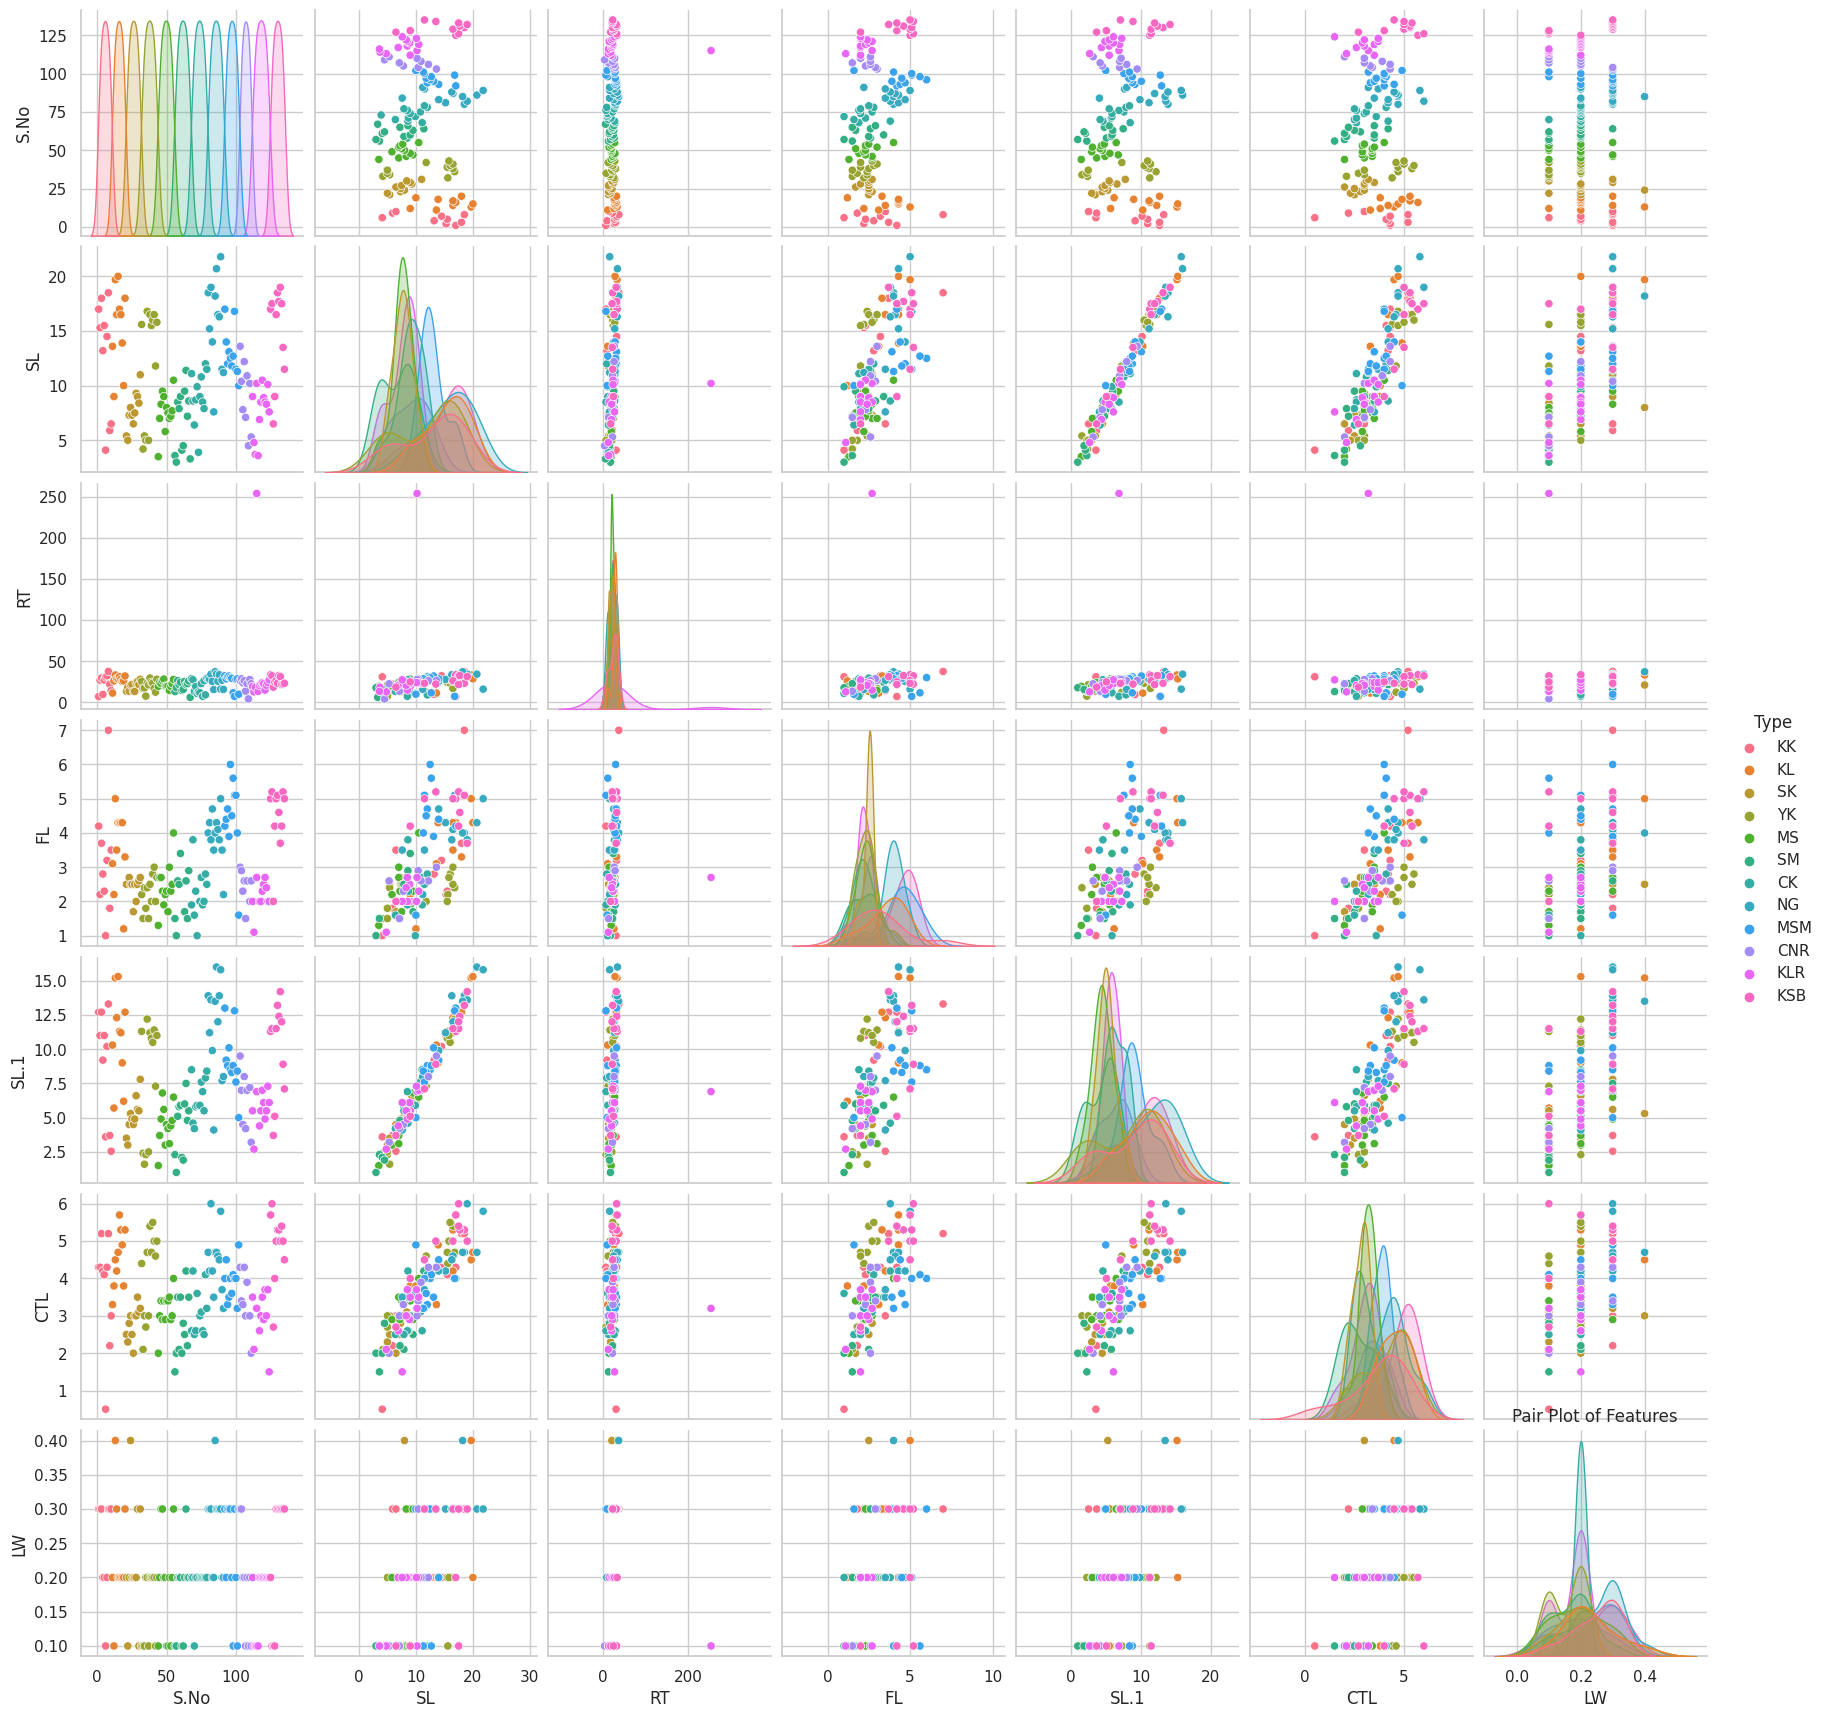

ValueError: could not convert string to float: 'KK'

<Figure size 1000x600 with 0 Axes>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
filename = "/kaggle/input/mydata/MultiClass-dataset.xlsx"
df = pd.read_excel(filename)

# Display the first few rows of the dataframe
print(df.head())

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Pair Plot to visualize relationships between numerical features
sns.pairplot(df, hue='Type')  # 'Type' is the categorical variable
plt.title('Pair Plot of Features')
plt.show()

# 2. Correlation Heatmap to visualize correlation between features
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# 3. Box Plot to visualize the distribution of a numerical feature by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='SL', data=df)  # Replace 'SL' with any other numerical column to visualize
plt.title('Box Plot of SL by Type')
plt.show()

# 4. Violin Plot for a similar purpose as the box plot but shows density
plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='FL', data=df)  # Replace 'FL' with any other numerical column to visualize
plt.title('Violin Plot of FL by Type')
plt.show()

In [3]:
df.isna().sum()

S.No    0
SL      0
RT      0
FL      8
SL.1    5
CTL     5
LW      2
Type    0
dtype: int64

In [4]:
df.isna().sum().sum()

20

In [5]:
df.size

1080

In [6]:
len(df)

135

In [7]:
df.shape

(135, 8)

In [8]:
df.columns

Index(['S.No', 'SL', 'RT', 'FL', 'SL.1', 'CTL', 'LW', 'Type'], dtype='object')

In [9]:
print(round(df.describe(),2))

         S.No      SL      RT      FL    SL.1     CTL      LW
count  135.00  135.00  135.00  127.00  130.00  130.00  133.00
mean    68.00   10.90   24.08    2.99    7.58    3.66    0.21
std     39.12    4.67   21.24    1.21    3.66    1.08    0.08
min      1.00    3.00    4.10    1.00    1.00    0.50    0.10
25%     34.50    7.50   17.15    2.00    4.82    3.00    0.20
50%     68.00   10.10   23.20    2.60    7.00    3.50    0.20
75%    101.50   15.25   27.90    4.00   10.95    4.47    0.30
max    135.00   21.80  254.00    7.00   16.00    6.00    0.40


In [10]:
df.drop("S.No",axis=1,inplace=True)# Removed unecessary attru=ibute

In [11]:
df[['FL', 'SL.1','CTL','LW']] = df[['FL', 'SL.1','CTL','LW']].fillna(df[['FL', 'SL.1','CTL','LW']].mean())# replaces Null values with mean

In [12]:
df.isna().sum()# no more null values

SL      0
RT      0
FL      0
SL.1    0
CTL     0
LW      0
Type    0
dtype: int64

In [13]:
y = df['Type']
x = df.drop(['Type'], axis=1) #prparing train data and label data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)# Splitting data into training and testing set

# Model training

In [15]:
clf = MLPClassifier(hidden_layer_sizes=(600,400,200), max_iter=1000, alpha=0.0001,
                     solver='adam', verbose=1,  random_state=42,tol=0.000000001)# An MLP classifier with 3 layers, 600 in ist 400 in 2nd and 200 in 3rd
#using adam solver


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


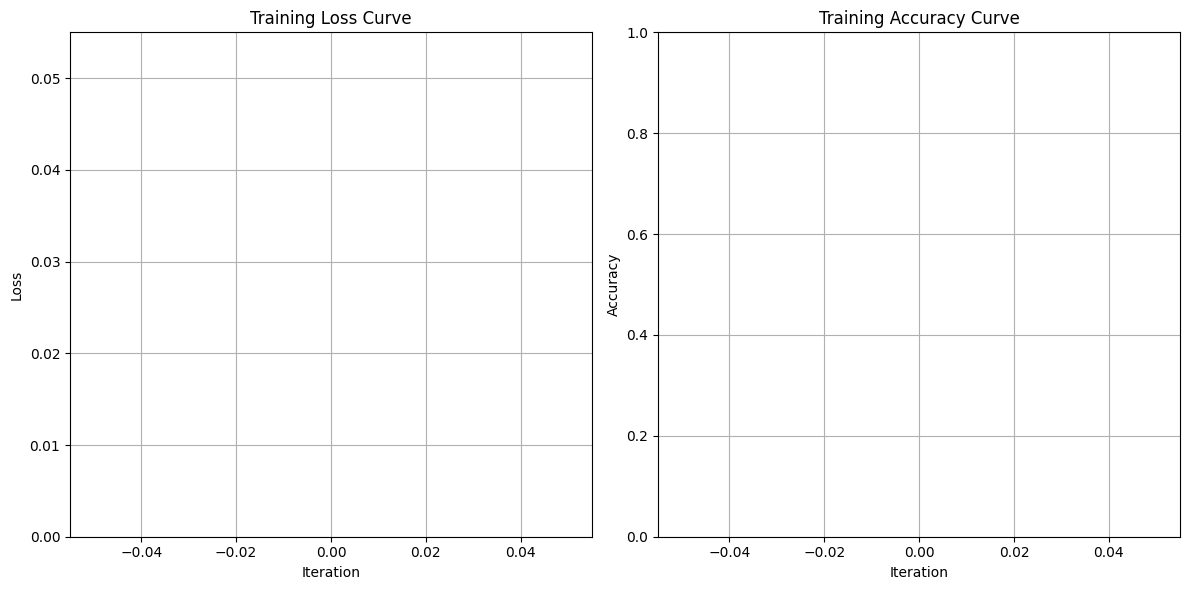

In [17]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

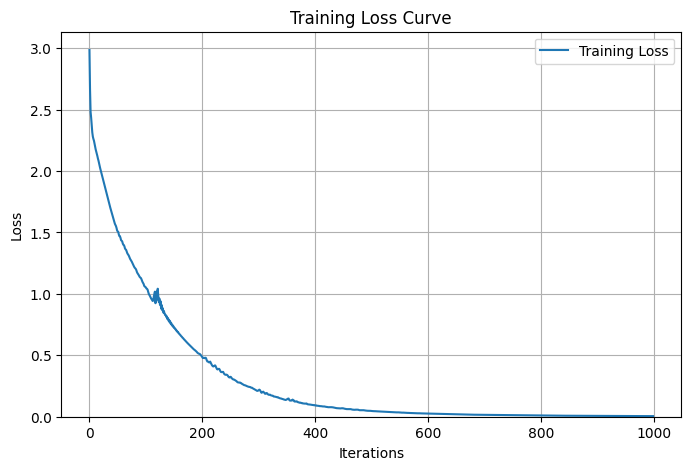

In [19]:


# Check if the model has the loss_curve_ attribute
if hasattr(clf, 'loss_curve_'):
    # Get the loss curve
    loss_curve = clf.loss_curve_

    # Create a plot of the loss curve
    plt.figure(figsize=(8, 5))
    plt.plot(loss_curve, label='Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.ylim(bottom=0)  # Set the lower limit to 0 for better visibility
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Loss curve is not available.")

In [18]:
loss_values

[]

In [20]:
accuracy_score(y_test, y_pred)## acuracy

0.4117647058823529

In [58]:
#rest of the metrics
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1score = f1_score(y_test, y_pred,average='macro')
 
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.37182539682539684
Recall = 0.4305555555555555
F1 Score = 0.36504884004884003


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
cm = confusion_matrix(y_test, y_pred)
cm#confusion matrix

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

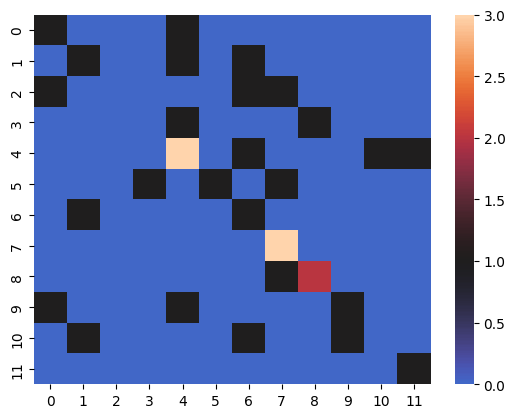

In [60]:
sns.heatmap(cm, center=True)
plt.show()# visualisation of confusion matrix

In [ ]:
# Another model

In [70]:
clf2 = MLPClassifier(hidden_layer_sizes=(1000,800,600,400,200,100,64,32), max_iter=1000, alpha=0.0001,
                     solver='lbfgs', verbose=1,  random_state=42,tol=0.000000001)# incread no of layers and neurons. Used lbfgs instead of adam
clf2.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      1638040     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51146D+00    |proj g|=  6.29614D-02


 This problem is unconstrained.



At iterate    1    f=  2.49216D+00    |proj g|=  5.87179D-02

At iterate    2    f=  2.47660D+00    |proj g|=  5.33919D-02

At iterate    3    f=  2.45444D+00    |proj g|=  2.74623D-02

At iterate    4    f=  2.44528D+00    |proj g|=  2.64531D-02

At iterate    5    f=  2.43388D+00    |proj g|=  2.74527D-02

At iterate    6    f=  2.41916D+00    |proj g|=  2.91978D-02

At iterate    7    f=  2.39533D+00    |proj g|=  6.30304D-02

At iterate    8    f=  2.36553D+00    |proj g|=  5.54440D-02

At iterate    9    f=  2.34834D+00    |proj g|=  5.63406D-02

At iterate   10    f=  2.32016D+00    |proj g|=  5.72195D-02

At iterate   11    f=  2.29373D+00    |proj g|=  6.39567D-02

At iterate   12    f=  2.26821D+00    |proj g|=  5.32979D-02

At iterate   13    f=  2.26090D+00    |proj g|=  7.37519D-02

At iterate   14    f=  2.25082D+00    |proj g|=  5.07809D-02

At iterate   15    f=  2.24096D+00    |proj g|=  4.91542D-02

At iterate   16    f=  2.22916D+00    |proj g|=  6.18847D-02

At iter

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [73]:
# the required metrics
acc= accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2,average='macro')
recall = recall_score(y_test, y_pred2,average='macro')
f1score = f1_score(y_test, y_pred2,average='macro')
print(f"Accuracy = {acc}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.4117647058823529
Precision = 0.37182539682539684
Recall = 0.4305555555555555
F1 Score = 0.36504884004884003


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
# Confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

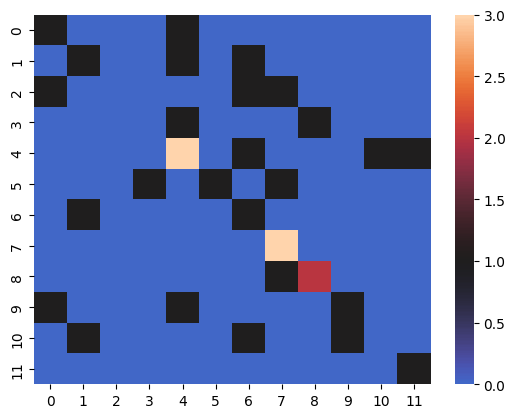

In [75]:
sns.heatmap(cm2, center=True)
plt.show()# visualisation of confusion matrix

# Inference:

## After trying various combinations of MLP classifier, by changing the no of layers and neurons in every layer apart from this 2 models, also trying various solvers like sgd,adam and lbfgs, it seems that there is no significant improvement after a certian threshold when it come to designing a model. Further analysis of data and pruning of data can be a good move to get better accuracy.
## Real Bad Dataset :(

## Model 1 
## Accuracy = 0.4117647058823529
## Precision = 0.37182539682539684
## Recall = 0.4305555555555555
## F1 Score = 0.36504884004884003

## Model 2:
## Accuracy = 0.4117647058823529
## Precision = 0.37182539682539684
## Recall = 0.4305555555555555
## F1 Score = 0.36504884004884003